<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A1%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%A3%D1%87%D0%B5%D0%B1%D0%BD%D0%BE%D0%B5_%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%B8%D0%B5_%D0%BF%D0%BE_SLIC_Superpixel_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;"><b>Сегментация: Учебное пособие по SLIC Superpixel с использованием Python</b></h1>



Суперпиксель можно определить как группу пикселей, которые имеют общие характеристики (например, интенсивность пикселей). Суперпиксели становятся полезными во многих алгоритмах компьютерного зрения и обработки изображений, таких как сегментация изображения, семантическая маркировка, обнаружение и отслеживание объектов и т. Д., По следующим причинам:
* Они несут больше информации, чем пиксели.
* Суперпиксели лучше воспринимается, поскольку пиксели, принадлежащие данному суперпикселю, обладают схожими визуальными свойствами.
* Они обеспечивают удобное и компактное представление изображений, которое может быть очень полезно для задач, требующих большого объема вычислений.

### Суперпиксели в контексте сегментации изображения
Сегментация изображений представляет собой процесс декомпозиции rкартинки на несколько сегментов (набор из пикселей или суперпикселей). Цель состоит в том, чтобы представить изображение как нечто более простое для анализа. Другими словами, сегментация изображения - это процесс присвоения метки каждому пикселю изображения таким образом, чтобы пиксели с одинаковой меткой обладали определенными характеристиками. Сегментацию можно использовать для определения объектов и границ (линий, кривых и т. Д.) На изображениях. 

SLIC (Простая линейная итеративная кластеризация) - Алгоритм для генерации суперпикселей.
Этот алгоритм генерирует суперпиксели путем кластеризации пикселей на основе их цветового сходства и близости в плоскости изображения.

### Download the code zip file

Загрузка файлов

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_21.superpixel.zip
!unzip -qq Lesson_21.superpixel.zip
%cd /content/Lesson_21.superpixel/

--2022-02-04 17:46:12--  http://dataudt.ru/datasets/cv/Lesson_21.superpixel.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 313233 (306K) [application/zip]
Saving to: ‘Lesson_21.superpixel.zip’

Lesson_21.superpixe 100%[===================>] 305.89K   458KB/s    in 0.7s    

2022-02-04 17:46:14 (458 KB/s) - ‘Lesson_21.superpixel.zip’ saved [313233/313233]

/content/Lesson_21.superpixel


## Blog Post Code

Основной блок кода

### Import Packages

Импорт библиотек

In [2]:
# import the necessary packages
# импортируем необходимые библиотеки
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt

### Simple Linear Iterative Clustering (SLIC)

Простая линейная итеративная кластеризация

In [3]:
# construct the argument parser and parse the arguments
# создаем парсер аргументов  и начинаем их собирать
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required = True, help = "Path to the image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
# пока мы используем Jupyter Notebooks мы можем заменить наш парсер
# явными аргументами и значениями
args = {
	"image": "unnamed.png"
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  # This is added back by InteractiveShellApp.init_path()


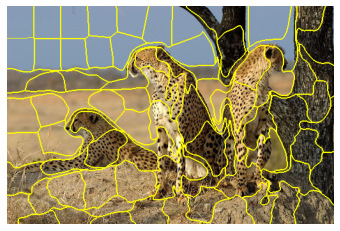

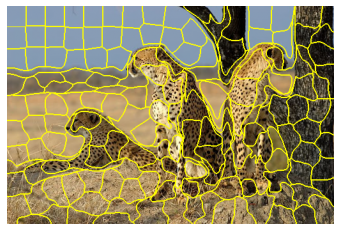

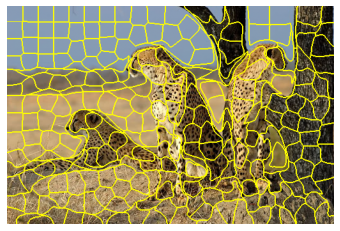

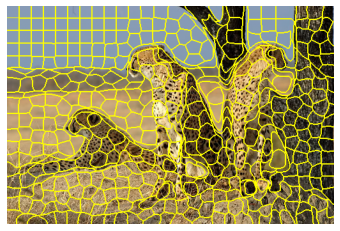

In [5]:
# load the image and convert it to a floating point data type
# загружаем изображение и преобразуем его в тип данных с плавающей точкой
image = img_as_float(io.imread(args["image"]))

# loop over the number of segments
# перебираем количество сегментов
for numSegments in (100, 200, 300, 500):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
    # применяем SLIC и извлекаем (приблизительное) представленное количество сегментов
	segments = slic(image, n_segments = numSegments, sigma = 5)

	# show the output of SLIC
    # показываем выходной SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(mark_boundaries(image, segments))
	plt.axis("off")

# show the plots
# показываем графики
plt.show()